# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\jerwin\AppData\Local\Temp\pip-install-x4024e3q\tensorflow-gpu_8ce1a5249c5a477caef669d5d787d309\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-

In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
aiofiles                     23.2.1
altair                       5.5.0
annotated-types              0.7.0
anyio                        4.6.2.post1
asgiref                      3.8.1
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        24.2.0
blinker                      1.7.0
cachetools                   5.5.0
certifi                      2024.2.2
charset-normalizer           3.3.2
chex                         0.1.87
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.2
decorator                    5.1.1
Django                       5.0.4
djangorestframework          3.15.1
etils                        1.9.4
exceptiongroup               1.2.1
executing                    2.0.


[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [8]:
#import cv2
import imghdr

In [12]:
data_dir = 'C:/Users/jerwin/Documents/GitHub/jerapp/dataset/data-pupaeDefects/train/Deformed body/deformedBody52.jpg' 

In [13]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [14]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:/Users/jerwin/Documents/GitHub/jerapp/dataset/data-pupaeDefects/train/Deformed body/deformedBody52.jpg'

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('C:/jerwin/PCMS/classification/static/data/defects')

Found 75 files belonging to 4 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

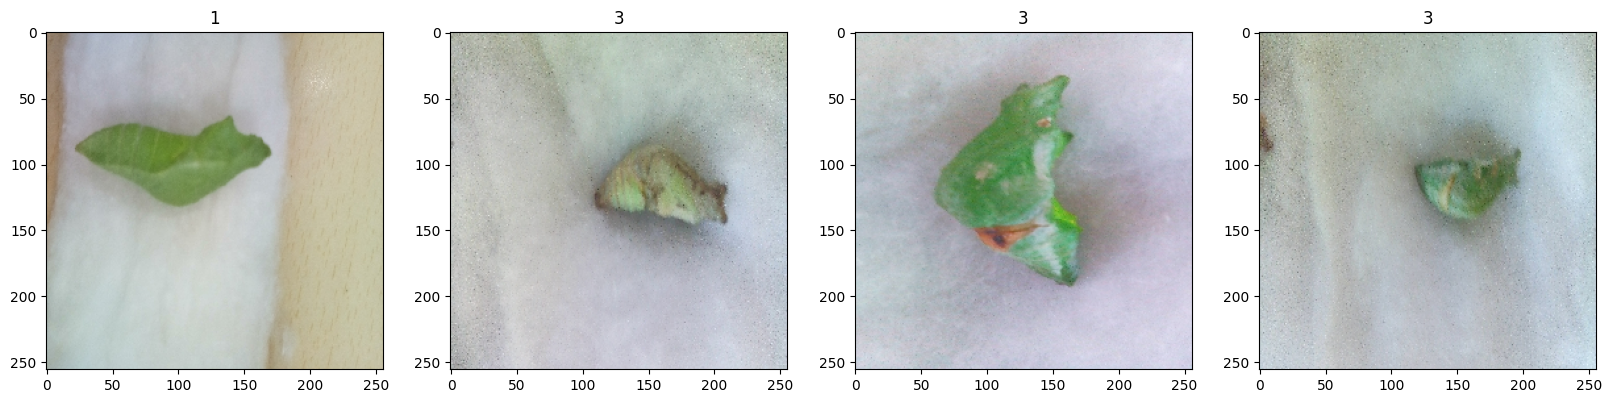

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.7872243 , 0.7519301 , 0.62742037],
          [0.78632045, 0.75102633, 0.6294577 ],
          [0.7775582 , 0.7422641 , 0.6206955 ],
          ...,
          [0.79666054, 0.74568015, 0.60842526],
          [0.78331804, 0.7323376 , 0.5950827 ],
          [0.79148287, 0.7405025 , 0.6032475 ]],
 
         [[0.79558825, 0.76029414, 0.63186276],
          [0.7808211 , 0.74552697, 0.62395835],
          [0.78809744, 0.7528033 , 0.6312347 ],
          ...,
          [0.8150123 , 0.7640319 , 0.62677693],
          [0.7866115 , 0.7390625 , 0.59151345],
          [0.7910999 , 0.74011946, 0.60286456]],
 
         [[0.7536305 , 0.7183364 , 0.58892465],
          [0.759712  , 0.7361826 , 0.60284925],
          [0.79106927, 0.77146137, 0.6459712 ],
          ...,
          [0.7842984 , 0.74508274, 0.60782784],
          [0.79204965, 0.75283396, 0.61557907],
          [0.8092371 , 0.75825673, 0.62100184]],
 
         ...,
 
         [[0.51178   , 0.43727022, 0.31962317],
          [0.52849

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

2

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 9s 2s/step - loss: 0.0000e+00 - accuracy: 0.3906
Epoch 2/20
2/2 [==============================] - 7s 1s/step - loss: 0.0000e+00 - accuracy: 0.5469
Epoch 3/20
2/2 [==============================] - 7s 1s/step - loss: 0.0000e+00 - accuracy: 0.5781
Epoch 4/20
2/2 [==============================] - 7s 1s/step - loss: 0.0000e+00 - accuracy: 0.5625
Epoch 5/20
2/2 [==============================] - 6s 2s/step - loss: 0.0000e+00 - accuracy: 0.5938
Epoch 6/20
2/2 [==============================] - 7s 2s/step - loss: 0.0000e+00 - accuracy: 0.5625
Epoch 7/20
2/2 [==============================] - 6s 1s/step - loss: 0.0000e+00 - accuracy: 0.5625
Epoch 8/20
2/2 [==============================] - 6s 2s/step - loss: 0.0000e+00 - accuracy: 0.5312
Epoch 9/20
2/2 [==============================] - 6s 1s/step - loss: 0.0000e+00 - accuracy: 0.5781
Epoch 10/20
2/2 [==============================] - 6s 1s/step - loss: 0.0000e+00 - accuracy: 0.5625
Epoch 11/

# 8. Plot Performance

KeyError: 'val_loss'

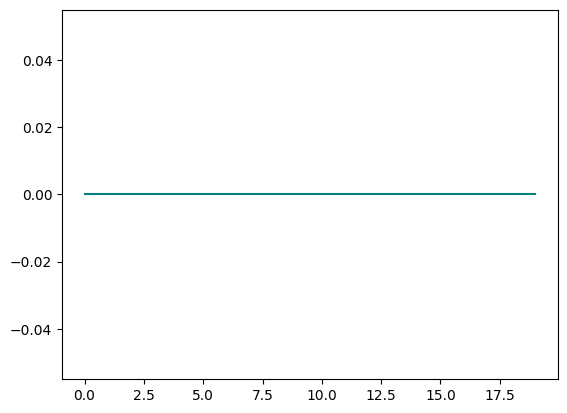

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

KeyError: 'val_accuracy'

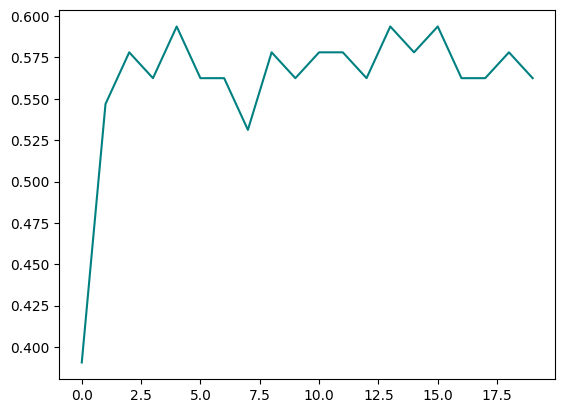

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.python.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/over_bend (2).jpg')
plt.imshow(img)
plt.show()

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

array([[0.01972741]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Defects')
else:
    print(f'Predicted class is Healthy')

Predicted class is Happy


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)